### Estatística descritiva - introdução & revisão
  
Usando:  
  - Pandas
  - Numpy
  - Matplotlib e Seaborn

In [1]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from statistics import mode

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

### O que é média?

Vamos supor que temos:

sequencia = {x1, x2, x3 .... xn}

<font size="5">\<x> = E[x] = media de x = $\frac{\sum_{i=1}^n{x_i}}{n}$</font>

### media de X = valor esperado de X

media = soma de todos os elementos dividido pelo número de elementos

normalmente se utiliza 
  - X (maiúsculo) para a lista, série de dados
  - x (minúsculo) para um determinado (particular) dado

### O que é desvio padrão populacional?
   Dado que conheço uma população, dada uma medida, qual a sua dispersão.

### O que é desvio padrão (amostral)?
   É a dispersão de uma medida dada uma amostra.
   Importante, que se você fizer **3 experimentos distintos**, você vai gerar 3 desvios padrões distintos e obviamente 3 medias distintas.
   A isto se chama replicata biológica (3 experimentos: triplicata)

### O que influência o número amostral?

Dado que conheço uma amostra (n amostral << Npop)  
  - Um n amostral:
    - pequeno (N < 30): gera erros ao estimar a media e o desvio padrão
    - grande  (30 >= N >= 100): minimiza estes erros
    - muito grande (N >> 30): valores esperados (media e desvio padrão) muito próxima "da realidade" (população)


#### Variância populacional

<font size="5">Var[X] \= variancia populacional \= $\frac{\sum_{i=1}^N{ (x_i - \mu)^2 }}{N}$</font>

#### Variância amostral - correçãod de Bessel - divide por graus de liberdade N-1

<font size="5">Var[X] \= variancia amostral \= $\frac{\sum_{i=1}^N{ (x_i - <x>)^2 }}{N-1}$</font>

#### Desvio Padrão
<font size="5">SD[X] = SQRT(Var[X])</font>

### Vamos pegar amostras de uma "distribuição normal"

  - gerador de numeros randômicos --> gerar distribuição normal
  - np.random.normal(media, desvio_padrao, size = qtas vezes)

In [2]:
mu = 1
sd = .5
N = 30

x = np.random.normal(mu, sd, N)
x

array([0.69170918, 0.43495498, 1.30328386, 1.5698738 , 1.34912668,
       0.29699454, 0.50363811, 0.20551922, 0.61745959, 0.94778729,
       0.72751241, 1.18559017, 0.62528428, 0.01711274, 1.68365577,
       0.85081182, 1.43756865, 1.56741891, 1.91617493, 0.89878757,
       0.72684322, 0.93287496, 0.37490355, 2.15026041, 1.56953974,
       0.70077852, 1.36501658, 0.4993527 , 1.96254857, 1.1648537 ])

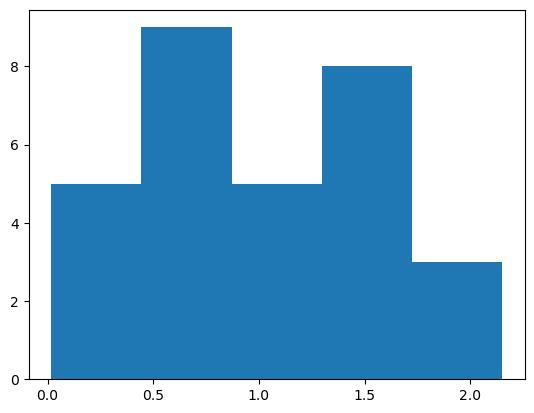

In [3]:
plt.hist(x, bins=5);

In [4]:
# transforma em tabela
seqx = np.arange(0, len(x))
df = pd.DataFrame({"num": seqx, "valor": x})
df.head(5)

,num,valor
0,0,0.691709
1,1,0.434955
2,2,1.303284
3,3,1.569874
4,4,1.349127


### Salvar os dados

In [5]:
filename = f'../data/amostras_{N}_dados.tsv'

if not os.path.exists(filename):
    df.to_csv(filename, sep='\t', index=False)
    print(f"Salvando '{filename}'")
else:
    df = pd.read_csv(filename, sep='\t')
    print(f"Lendo '{filename}'")

print(len(df))
df.head(3)

Lendo '../data/amostras_30_dados.tsv'
30


,num,valor
0,0,1.432017
1,1,1.088334
2,2,0.210247


In [6]:
import numpy as np
from statistics import mode

# metodo estatístico
def mostra_estatistica(lista: list, verbose:bool=False):

    mini = np.min(lista)
    maxi = np.max(lista)

    mu = np.mean(lista)
    med = np.median(lista)
    mod = mode(lista)

    SSD = np.std(lista)

    n = len(lista)
    n4 = int(n/4)

    lista = list(lista)
    lista.sort()

    mini = int( lista[0] )
    maxi = int( lista[-1] )

    q1, q2, q3 = np.quantile(x, [0.25, 0.5, 0.75])
    mediana = q2

    s_quantile = f"mínimo {mini}, Q1 {q1}, mediana {mediana}, Q3 {q3}, máximo {maxi}"

    stri = f"N={N} - media={mu:.2f} median={med:.2f} moda={mod:.2f} e SSD={SSD:.2f}"
    if verbose:
      print(stri)
      print(s_quantile)

    return n, mu, q1, med, q3, mod, SSD, mini, maxi, stri, s_quantile


### Estatísticas básicas
  - Qual a diferença de x e df.valor?

In [7]:
n, mu, q1, med, q2, mod, SSD, mini, maxi, stri, s_quantile = mostra_estatistica(x, verbose=True)

N=30 - media=1.01 median=0.92 moda=0.69 e SSD=0.55
mínimo 0, Q1 0.6194157587492832, mediana 0.915831269387094, Q3 1.4194306330515714, máximo 2


In [8]:
n, mu, q1, med, q2, mod, SSD, mini, maxi, stri, s_quantile = mostra_estatistica(df.valor, verbose=True)

N=30 - media=1.17 median=1.24 moda=1.43 e SSD=0.48
mínimo 0, Q1 0.6194157587492832, mediana 0.915831269387094, Q3 1.4194306330515714, máximo 2


### Plotando histograma de frequências

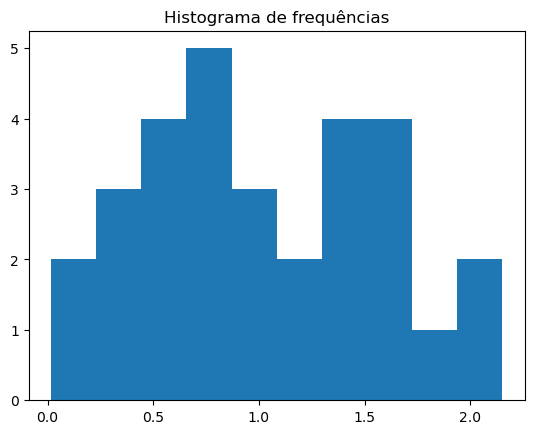

In [9]:
ret = plt.hist(x)
plt.title("Histograma de frequências");

### Calculando a media 

<font size="5">\<x> = E[x] = media de x = $\frac{\sum_{i=1}^n{x_i}}{n}$</font>

In [10]:
# inicialização, com valor 0
mu = 0

for xi in x:
    mu = mu + xi
    
# len(x) é comprimento desta list x = N
mu = mu / len(x)
np.round(mu, 3)

np.float64(1.009)

In [11]:
mu = np.mean(x)
np.round(mu, 3)

np.float64(1.009)

### Calculando o desvio padrão

<font size="5">Var[X] \= variança de x \= $\frac{\sum_{i=1}^n{ (x_i - <x>)^2 }}{n-1}$</font>

<font size="5">SSD[X] = SQRT(Var[X])</font>

In [12]:
len(x)

30

In [13]:
# inicialização da variância com valor 0
sum_quad = 0

for xi in x:
    sum_quad += (xi - mu)**2

print("n-1", len(x)-1)

var = sum_quad / (len(x)-1)
SSD = np.sqrt(var)
np.round(SSD, 3)

n-1 29


np.float64(0.56)

In [14]:
### numpy divide por n e não (n-1)
SSD = np.std(x)
np.round(SSD, 3)

np.float64(0.55)

### Mediana

#### O valor que separa metade da amostra inferior e metade superior

Analisar o peso 100 camundongos após um dado tratamento:
  - ordeno os camundos por peso (menor --> maior peso)
    - vou ter os 50 primeiros
    - vou ter os 50 últimos mais pesados
    - o valor intermediário = MEDIANA

#### Importante: quando a distribuição não é simétrica ou há dúvidas, use sempre a Mediana e não a Media

#### Mediana é o melhor parâmetro para avaliar o valor central de uma distribuição

(mais adiante vamos ver o que é distribuição)

In [15]:
x = [2, 5, 17, 11, 15, 8, 9, 23]
x, len(x)

([2, 5, 17, 11, 15, 8, 9, 23], 8)

In [16]:
print("como o comprimento é 8 a mediana é o valor entre os valores da posição 3 e 4 - começando do zero")
x.sort()
x

como o comprimento é 8 a mediana é o valor entre os valores da posição 3 e 4 - começando do zero


[2, 5, 8, 9, 11, 15, 17, 23]

In [17]:
np.median(x), "é o valor entre 9 e 11"

(np.float64(10.0), 'é o valor entre 9 e 11')

### A mediana de uma série de inteiros pode ser um ponto flutuante

  - [3, 4, 6] --> inteiro
  - [3, 4, 6, 9] --> inteiro
  - [3, 4, 5, 7] --> float
- 

### Moda

#### é o valor com mais alta frequência

#### uma distriuição pode ter múltiplas modas (multimodal)

#### no python há várias bibliotecas estatísticas
  - numpy (np)
  - stats
  
#### com elas podemos amostrar N números randomicos baseados em quaisquer distribuições
  - para distribuição Normal
  
    - np.random.normal(mu, sd, N)  
ou
    - stats.norm.rvs(loc=mu,scale=sd,size=N)  

**estas funções geram N números amostrados ranomicamente de uma distribuição normal com media mu e desvio padrão sd**

In [18]:
mu  = np.mean(x)
ssd = np.std(x)
med = np.median(x)
mod = mode(x)

#-- cálculo dos parametros
np.round(mu,2), np.round(ssd,2), np.round(med), mod

(np.float64(11.25), np.float64(6.38), np.float64(10.0), 2)

In [19]:
# Q1 25%
# Q2 50%
# Q3 75%
np.quantile(x, [.25, .5, .75])

array([ 7.25, 10.  , 15.5 ])

In [20]:
x.sort()
len(x)

8

In [21]:
x[0:int(len(x)/4)]

[2, 5]

In [22]:
(np.max(x[0:int(len(x)/4)]) + np.max(x[0:int(len(x)/4)+1]))/2

np.float64(6.5)

### Plotando histograma de frequências, controlando os bins (intervalos em x)

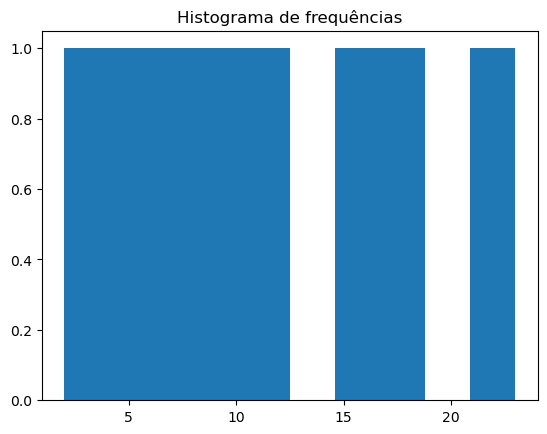

In [23]:
ret = plt.hist(x, bins=10)
plt.title("Histograma de frequências");

### Plotando histograma de densidade = distribuição

  - uma distribuição é um histograma de frequência normalizado

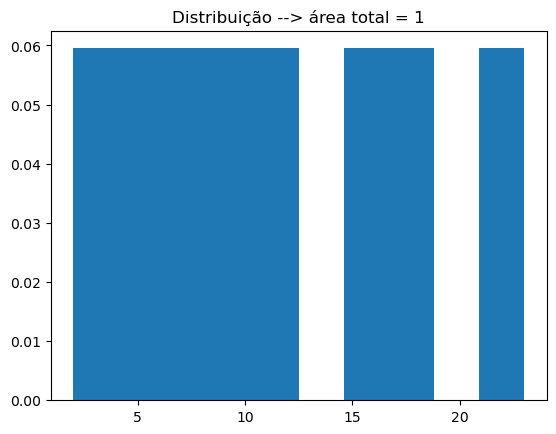

In [24]:
ret = plt.hist(x, bins=10, density=True)
plt.title("Distribuição --> área total = 1");